* sparse autoencoder
* regularization autoencoder

unsupervised learning algorithm

* dimention reduction
* feature extraction
* denoising

aims to record information as little as possible

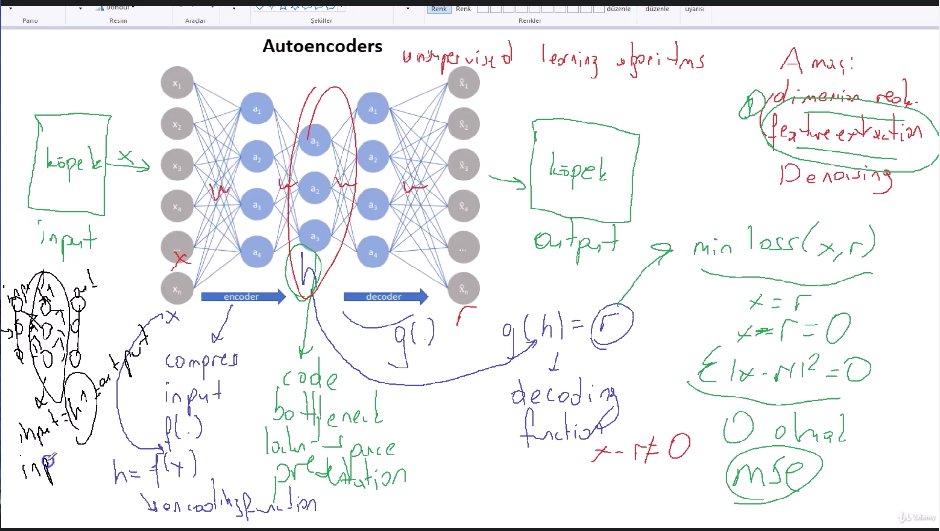

* denoising

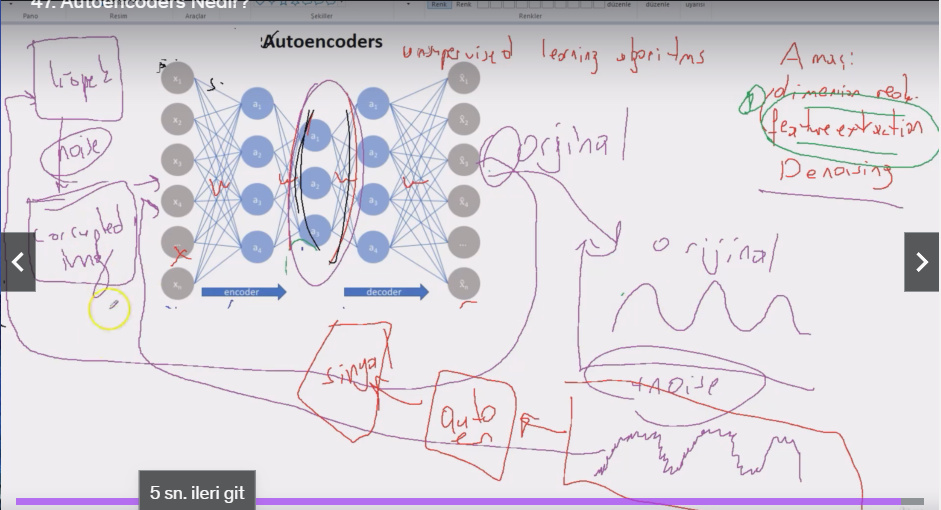

In [6]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import json, codecs
import warnings
warnings.filterwarnings("ignore")

In [7]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [8]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [10]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [11]:
x_train = x_train.reshape((len(x_train), x_train.shape[1:][0]*x_train.shape[1:][1]))
x_test = x_test.reshape((len(x_test), x_test.shape[1:][0]*x_test.shape[1:][1]))

In [12]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


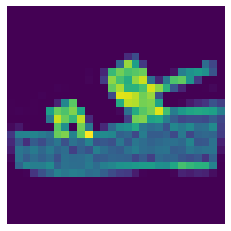

In [16]:
plt.imshow(x_train[12].reshape(28,28))
plt.axis("off")
plt.show()

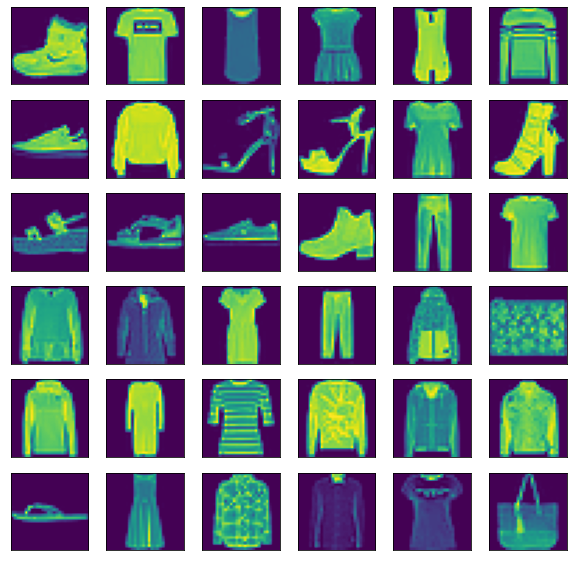

In [18]:
import numpy as np
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = [x_train[i]]
    img = np.reshape(img, (28, 28))
    plt.imshow(img)
plt.show()

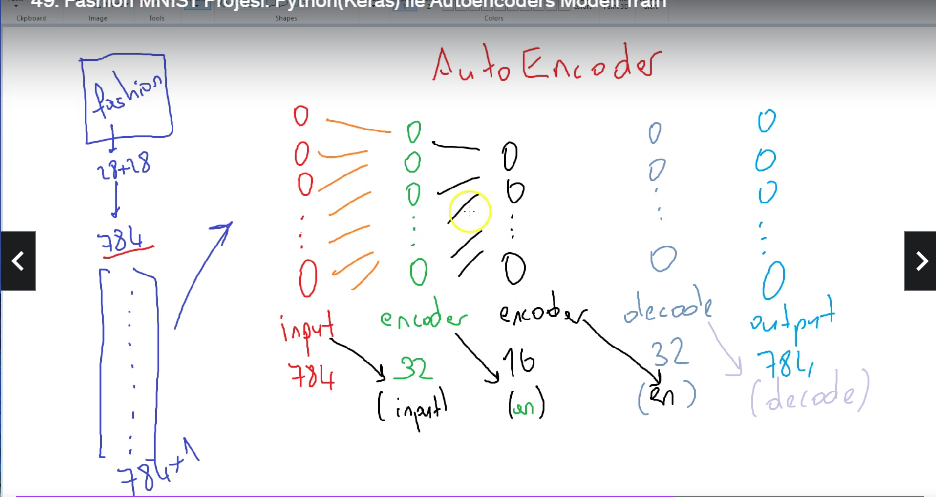

In [21]:
input_img = Input(shape = (784,))
encoded = Dense(32, activation="relu")(input_img)
encoded = Dense(16, activation="relu")(encoded)
decoded = Dense(32, activation="relu")(encoded)
decoded = Dense(784, activation="sigmoid")(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

hist = autoencoder.fit(x_train,
                      x_train,
                      epochs=200,
                      batch_size=256,
                      shuffle=True,
                      validation_data=(x_train, x_train))

Epoch 1/200
235/235 [==============================] - 5s 12ms/step - loss: 0.4065 - accuracy: 0.0089 - val_loss: 0.3519 - val_accuracy: 0.0116
Epoch 2/200
235/235 [==============================] - 2s 10ms/step - loss: 0.3369 - accuracy: 0.0089 - val_loss: 0.3263 - val_accuracy: 0.0108
Epoch 3/200
235/235 [==============================] - 2s 9ms/step - loss: 0.3244 - accuracy: 0.0122 - val_loss: 0.3236 - val_accuracy: 0.0160
Epoch 4/200
235/235 [==============================] - 2s 7ms/step - loss: 0.3195 - accuracy: 0.0136 - val_loss: 0.3179 - val_accuracy: 0.0163
Epoch 5/200
235/235 [==============================] - 2s 7ms/step - loss: 0.3162 - accuracy: 0.0146 - val_loss: 0.3134 - val_accuracy: 0.0137
Epoch 6/200
235/235 [==============================] - 2s 7ms/step - loss: 0.3134 - accuracy: 0.0138 - val_loss: 0.3110 - val_accuracy: 0.0143
Epoch 7/200
235/235 [==============================] - 2s 7ms/step - loss: 0.3110 - accuracy: 0.0132 - val_loss: 0.3085 - val_accuracy: 0.01

Epoch 58/200
235/235 [==============================] - 2s 7ms/step - loss: 0.2903 - accuracy: 0.0193 - val_loss: 0.2904 - val_accuracy: 0.0179
Epoch 59/200
235/235 [==============================] - 2s 7ms/step - loss: 0.2902 - accuracy: 0.0193 - val_loss: 0.2898 - val_accuracy: 0.0185
Epoch 60/200
235/235 [==============================] - 2s 7ms/step - loss: 0.2902 - accuracy: 0.0199 - val_loss: 0.2898 - val_accuracy: 0.0209
Epoch 61/200
235/235 [==============================] - 2s 7ms/step - loss: 0.2901 - accuracy: 0.0190 - val_loss: 0.2904 - val_accuracy: 0.0233
Epoch 62/200
235/235 [==============================] - 2s 7ms/step - loss: 0.2901 - accuracy: 0.0198 - val_loss: 0.2899 - val_accuracy: 0.0220
Epoch 63/200
235/235 [==============================] - 2s 7ms/step - loss: 0.2900 - accuracy: 0.0191 - val_loss: 0.2901 - val_accuracy: 0.0235
Epoch 64/200
235/235 [==============================] - 2s 7ms/step - loss: 0.2899 - accuracy: 0.0203 - val_loss: 0.2902 - val_accuracy:

Epoch 115/200
235/235 [==============================] - 2s 7ms/step - loss: 0.2879 - accuracy: 0.0209 - val_loss: 0.2881 - val_accuracy: 0.0208
Epoch 116/200
235/235 [==============================] - 2s 7ms/step - loss: 0.2879 - accuracy: 0.0211 - val_loss: 0.2872 - val_accuracy: 0.0217
Epoch 117/200
235/235 [==============================] - 2s 7ms/step - loss: 0.2879 - accuracy: 0.0213 - val_loss: 0.2889 - val_accuracy: 0.0195
Epoch 118/200
235/235 [==============================] - 2s 7ms/step - loss: 0.2878 - accuracy: 0.0207 - val_loss: 0.2884 - val_accuracy: 0.0192
Epoch 119/200
235/235 [==============================] - 2s 7ms/step - loss: 0.2878 - accuracy: 0.0211 - val_loss: 0.2876 - val_accuracy: 0.0234
Epoch 120/200
235/235 [==============================] - 2s 7ms/step - loss: 0.2878 - accuracy: 0.0214 - val_loss: 0.2882 - val_accuracy: 0.0225
Epoch 121/200
235/235 [==============================] - 2s 8ms/step - loss: 0.2878 - accuracy: 0.0213 - val_loss: 0.2876 - val_ac

In [22]:
#save weights
autoencoder.save_weights("autoencoder_model.h5")

In [23]:
#save model
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


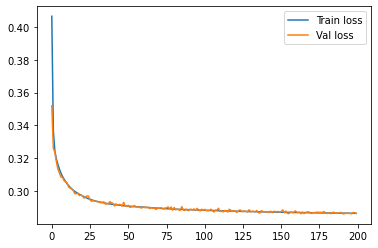

In [24]:
plt.plot(hist.history["loss"],label = "Train loss")
plt.plot(hist.history["val_loss"],label = "Val loss")
plt.legend()
plt.show()

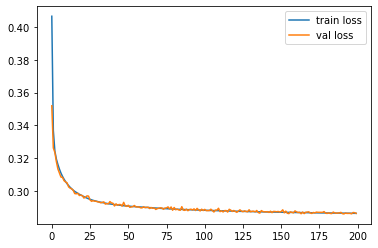

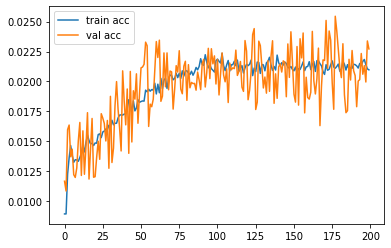

In [25]:
plt.plot(hist.history["loss"], label = "train loss")
plt.plot(hist.history["val_loss"], label = "val loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label = "train acc")
plt.plot(hist.history["val_accuracy"], label = "val acc")
plt.legend()
plt.show()

In [26]:
#save hist
with open("autoencoders_hist.json","w") as f:
    json.dump(hist.history,f)

In [27]:
#load history
with codecs.open("autoencoders_hist.json","r", encoding="utf-8")  as f:
    n = json.loads(f.read())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


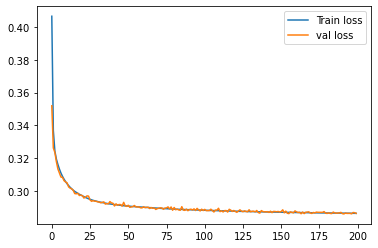

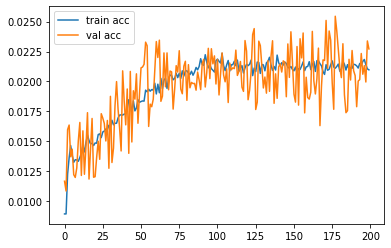

In [28]:
print(n.keys())
plt.plot(n["loss"],label = "Train loss")
plt.plot(n["val_loss"], label = "val loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(n["accuracy"], label = "train acc")
plt.plot(n["val_accuracy"], label = "val acc")
plt.legend()
plt.show()

In [29]:
encoder = Model(input_img,encoded) #inputtan başlayıp decoder layer'a kadar olan model
encoded_img = encoder.predict(x_test) 

313/313 [==============================] - 5s 2ms/step


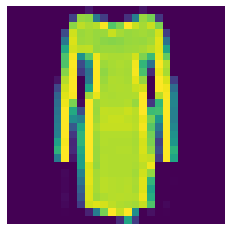

In [30]:
plt.imshow(x_test[1500].reshape(28,28))
plt.axis("off")
plt.show()

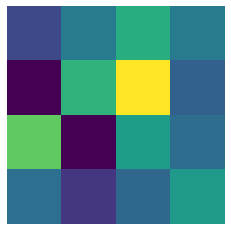

In [31]:
plt.figure()
plt.imshow(encoded_img[1500].reshape(4,4))
plt.axis("off")
plt.show()

In [32]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


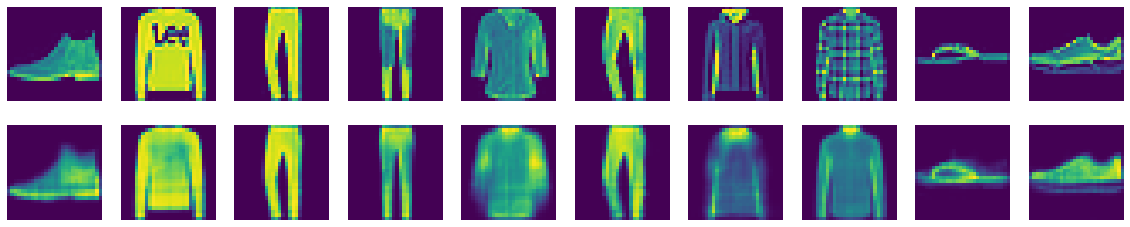

In [33]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.axis("off")

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.axis("off")
plt.show()